In [2]:
import cv2
import numpy as np


# detect colored shapes

## step 1
Reduce the number of colors to 3
* blue 
* white
* green


In [32]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    #processing on the frame
    blue_lower=np.array([100,150,0],np.uint8)
    blue_upper=np.array([140,255,255],np.uint8)
    #detect blue
    mask = cv2.inRange(frame, lower_blue, upper_blue)
    # Display the resulting frame
    cv2.imshow('frame',mask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### detect color and extract shape

In [ ]:
import cv2
import numpy as np


def nothing(lol):
    pass

cap = cv2.VideoCapture(0)
     

cv2.namedWindow("Hsv Capture")

# create trackbars for color change
# IMPORTANT: You have to define the correct HSV opencv range hence 179,255,255
cv2.createTrackbar('H low', 'Hsv Capture', 0, 179, nothing)
cv2.createTrackbar('S low', 'Hsv Capture', 0, 255, nothing)
cv2.createTrackbar('V low', 'Hsv Capture', 0, 255, nothing)

cv2.createTrackbar('H high', 'Hsv Capture', 0, 179, nothing)
cv2.createTrackbar('S high', 'Hsv Capture', 0, 255, nothing)
cv2.createTrackbar('V high', 'Hsv Capture', 0, 255, nothing)

cv2.setTrackbarPos('H low', 'Hsv Capture', 90)
cv2.setTrackbarPos('S low', 'Hsv Capture', 30)
cv2.setTrackbarPos('V low', 'Hsv Capture', 0)

cv2.setTrackbarPos('H high', 'Hsv Capture', 132)
cv2.setTrackbarPos('S high', 'Hsv Capture', 255)
cv2.setTrackbarPos('V high', 'Hsv Capture', 125)

while(True):

    ret, imag = cap.read()
    #imag = cv2.imread("images/thymio_1.jpg")
    frame = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
    
    

    # Trackbars realtime position
    h1 = cv2.getTrackbarPos('H low', 'Hsv Capture')
    s1 = cv2.getTrackbarPos('S low', 'Hsv Capture')
    v1 = cv2.getTrackbarPos('V low', 'Hsv Capture')

    h2 = cv2.getTrackbarPos('H high', 'Hsv Capture')
    s2 = cv2.getTrackbarPos('S high', 'Hsv Capture')
    v2 = cv2.getTrackbarPos('V high', 'Hsv Capture')

    #How to store the min and max values from the trackbars
    blue_MIN = np.array([h1, s1, v1], np.uint8)
    blue_MAX = np.array([h2, s2, v2], np.uint8)

    #After finding your values, you can replace them like this
    #blue_MIN = np.array([95, 123, 0], np.uint8)
    #blue_MAX = np.array([135, 207, 255], np.uint8)
            
    #Using inRange to find the desired range
    hsvCapture = cv2.inRange(frame,  blue_MIN, blue_MAX)
    
    contours, hierarchy = cv2.findContours(hsvCapture, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    #clean contours
    
    AREA_THRESH = 500
    
    MERGE_THRESH = 0.04
    
    clean_contours = []
    
    for cnt in contours:
        # only take big enough contours
        if (cv2.contourArea(cnt) >= AREA_THRESH):
            #convex hull
            #hull = cv2.convexHull(cnt)
            hull = cnt
            #lower poly approx
            epsilon = MERGE_THRESH*cv2.arcLength(hull,True)
            approx = cv2.approxPolyDP(hull,epsilon,True)
            
            clean_contours.append(approx)
            
            
    
    
    mask = hsvCapture
    mask_inv = cv2.bitwise_not(mask)
    
    blue = np.zeros(frame.shape, np.uint8)

    blue[:]=(255,0,0)
    
    bg = cv2.bitwise_and(imag,imag,mask = mask_inv)
    fg = cv2.bitwise_and(blue,blue,mask = mask)
    
    #final = cv2.add(bg,fg)
    final = imag
    
    cv2.drawContours(final, clean_contours, -1, (0,255,0), 3)
    
    #draw points
    
    
    for cnt in clean_contours:
        for pt in cnt:
            final = cv2.circle(final, (pt[0][0], pt[0][1]), radius=5, color=(0, 0, 255), thickness=-1)
            

    cv2.imshow('Hsv Capture', final)
    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(clean_contours)
        break

cap.release()
cv2.destroyAllWindows()

### Exemple de output pour romain

In [53]:
cnt = [np.array([[[504, 236]],

       [[495, 199]],

       [[380, 212]],

       [[438, 274]]], dtype=np.int32), np.array([[[170, 195]],

       [[254, 275]],

       [[296, 238]],

       [[235, 194]]], dtype=np.int32), np.array([[[302, 168]],

       [[290, 182]],

       [[294, 199]],

       [[312, 209]],

       [[333, 203]],

       [[337, 175]]], dtype=np.int32), np.array([[[228, 151]],

       [[301, 102]],

       [[219,  89]]], dtype=np.int32), np.array([[[481, 130]],

       [[457,  66]],

       [[360,  81]],

       [[434, 150]]], dtype=np.int32)]


###  essay de detection du robot

This strategy is not really good in my opinion...

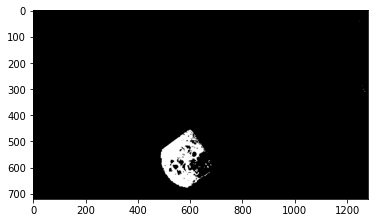

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imag = cv2.imread("images/thymio_1.jpg")
frame = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)


color_MIN = np.array([70, 10, 120], np.uint8)
color_MAX = np.array([155, 60, 180], np.uint8)

#Using inRange to find the desired range
hsvCapture = cv2.inRange(frame,  color_MIN, color_MAX)

contours, hierarchy = cv2.findContours(hsvCapture, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)

#clean contours

AREA_THRESH = 500

MERGE_THRESH = 0.04

clean_contours = []

for cnt in contours:
    # only take big enough contours
    if (cv2.contourArea(cnt) >= AREA_THRESH):
        #convex hull
        #hull = cv2.convexHull(cnt)
        hull = cnt
        #lower poly approx
        epsilon = MERGE_THRESH*cv2.arcLength(hull,True)
        approx = cv2.approxPolyDP(hull,epsilon,True)

        clean_contours.append(approx)

            
    
    
mask = hsvCapture
mask_inv = cv2.bitwise_not(mask)

final = imag
    
cv2.drawContours(final, clean_contours, -1, (0,255,0), 5)

#draw points


for cnt in clean_contours:
    for pt in cnt:
        final = cv2.circle(final, (pt[0][0], pt[0][1]), radius=5, color=(0, 0, 255), thickness=-1)


#plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
plt.imshow(mask, cmap="gray")

### We try again to detect the robot
This time we used a template and feature matching

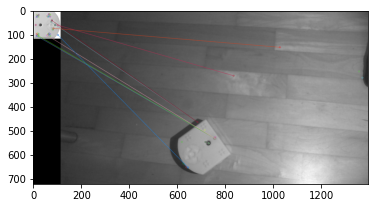

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("images/thymio_1.jpg")
ref = cv2.imread("images/reference_small.png")

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ref_gray = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

img_kp, img_des = sift.detectAndCompute(img_gray,None)
img_disp=cv2.drawKeypoints(img_gray,img_kp,img)

ref_kp, ref_des = sift.detectAndCompute(ref_gray,None)
ref_disp=cv2.drawKeypoints(ref_gray,ref_kp,ref)

#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(ref_des,img_des,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.9*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
# cv2.drawMatchesKnn expects list of lists as matches.
flann_result = cv2.drawMatchesKnn(ref,ref_kp,img,img_kp,matches, None, **draw_params)


#BRUTEFORCE
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(ref_des,img_des, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
knn_result = cv2.drawMatchesKnn(ref,ref_kp,img,img_kp,good, None, flags=2)




plt.imshow(cv2.cvtColor(knn_result, cv2.COLOR_BGR2RGB))


In [100]:
print(good)

[[<DMatch 000001B78C0F2BB0>], [<DMatch 000001B7A22C6C90>], [<DMatch 000001B7A22D94D0>], [<DMatch 000001B7A22D93D0>], [<DMatch 000001B7A22D9410>], [<DMatch 000001B7A232A910>], [<DMatch 000001B7A2380CD0>], [<DMatch 000001B7A2380D10>]]


# Detect thymio using blue triangle

In [60]:
import cv2
import numpy as np


def nothing(lol):
    pass

cap = cv2.VideoCapture(0)
     

cv2.namedWindow("Hsv Capture")

# create trackbars for color change
# IMPORTANT: You have to define the correct HSV opencv range hence 179,255,255
cv2.createTrackbar('H low', 'Hsv Capture', 0, 179, nothing)
cv2.createTrackbar('S low', 'Hsv Capture', 0, 255, nothing)
cv2.createTrackbar('V low', 'Hsv Capture', 0, 255, nothing)

cv2.createTrackbar('H high', 'Hsv Capture', 0, 179, nothing)
cv2.createTrackbar('S high', 'Hsv Capture', 0, 255, nothing)
cv2.createTrackbar('V high', 'Hsv Capture', 0, 255, nothing)

cv2.setTrackbarPos('H low', 'Hsv Capture', 83)
cv2.setTrackbarPos('S low', 'Hsv Capture', 165)
cv2.setTrackbarPos('V low', 'Hsv Capture', 110)

cv2.setTrackbarPos('H high', 'Hsv Capture', 120)
cv2.setTrackbarPos('S high', 'Hsv Capture', 255)
cv2.setTrackbarPos('V high', 'Hsv Capture', 255)

while(True):

    ret, imag = cap.read()
    #imag = cv2.imread("images/thymio_1.jpg")
    frame = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
    
    

    # Trackbars realtime position
    h1 = cv2.getTrackbarPos('H low', 'Hsv Capture')
    s1 = cv2.getTrackbarPos('S low', 'Hsv Capture')
    v1 = cv2.getTrackbarPos('V low', 'Hsv Capture')

    h2 = cv2.getTrackbarPos('H high', 'Hsv Capture')
    s2 = cv2.getTrackbarPos('S high', 'Hsv Capture')
    v2 = cv2.getTrackbarPos('V high', 'Hsv Capture')

    #How to store the min and max values from the trackbars
    blue_MIN = np.array([h1, s1, v1], np.uint8)
    blue_MAX = np.array([h2, s2, v2], np.uint8)
            
    #Using inRange to find the desired range
    hsvCapture = cv2.inRange(frame,  blue_MIN, blue_MAX)
    
    contours, hierarchy = cv2.findContours(hsvCapture, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    #clean contours
    
    AREA_THRESH = 500
    
    MERGE_THRESH = 0.04
    
    clean_contours = []
    
    for cnt in contours:
        # only take big enough contours
        if (cv2.contourArea(cnt) >= AREA_THRESH):
            #convex hull
            #hull = cv2.convexHull(cnt)
            hull = cnt
            #lower poly approx
            epsilon = MERGE_THRESH*cv2.arcLength(hull,True)
            approx = cv2.approxPolyDP(hull,epsilon,True)
            
            clean_contours.append(approx)
            
            
    
    
    mask = hsvCapture
    mask_inv = cv2.bitwise_not(mask)
    
    blue = np.zeros(frame.shape, np.uint8)

    blue[:]=(255,0,0)
    
    bg = cv2.bitwise_and(imag,imag,mask = mask_inv)
    fg = cv2.bitwise_and(blue,blue,mask = mask)
    
    #final = cv2.add(bg,fg)
    final = imag
    
    cv2.drawContours(final, clean_contours, -1, (0,255,0), 1)
    
    #draw points
    
    good_cnt = []
    for cnt in clean_contours:
        if(len(cnt) == 3):
            K = 2
            A = 0
            B = 0
            C = 0
            dAB = 0
            dBC = 0
            dCA = 0
            p1 = cnt[0][0]
            p2 = cnt[1][0]
            p3 = cnt[2][0]
            d1 = np.linalg.norm(p2-p1)
            d2 = np.linalg.norm(p3-p2)
            d3 = np.linalg.norm(p1-p3)
            min_ix = np.argmin([d1, d2, d3])
            if(min_ix == 0):
                A = p3
                B = p2
                C = p1
                dAB = d2
                dBC = d1
                dCA = d3
            elif(min_ix == 1):
                A = p1
                B = p3
                C = p2
                dAB = d3
                dBC = d2
                dCA = d1
            else:
                A = p2
                B = p3
                C = p1
                dAB = d2
                dBC = d3
                dCA = d1
            score = (abs(dAB-dCA)+abs(K*dBC - dAB)+abs(K*dBC - dCA))/np.linalg.norm(A-D)
            
            good_cnt.append([A, B, C, score]);
            
    #choose best contour
    
    good_cnt = sorted(good_cnt, key = lambda x: x[3])
    
    robot_pos = [np.array([0, 0]), 0, False];
    
    if(len(good_cnt) > 0):
        robot_visible = True
        A = good_cnt[0][0]
        B = good_cnt[0][1]
        C = good_cnt[0][2]
        D = (np.mean([[B, C]], axis=1))[0]
        
        
        Center = (np.mean([[A, B, C]], axis=1))[0]
        final = cv2.line(final, (int(D[0]), int(D[1])), (int(A[0]), int(A[1])), color=(0, 0, 255), thickness=1)
        final = cv2.circle(final, (int(Center[0]), int(Center[1])), radius=5, color=(0, 0, 255), thickness=-1)
        

        
        direction = A - D
        
        angle = np.arctan2(direction[1], direction[0])
        
        robot_pos = [Center, angle, True]
        
            
    print(robot_pos)
            
            
            

    cv2.imshow('Hsv Capture', final)
    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(clean_contours)
        break

cap.release()
cv2.destroyAllWindows()

[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([394.33333333, 362.33333333]), 0.08941610674759004, True]
[array([0, 0]), 0, False]
[array([0, 0]), 0, False]
[array([394.33333333, 363.        ]), 0.061989441194520045, True]
[array([393.33333333, 364.66666667]), 0.12435499454676144, True]
[array([0, 0]), 0, False]
[array([391.33333333, 367.        ]), 0.10985011884713057, True]
[array([395.        , 365.66666667]), 0.06340695196683198, True]
[array([395.33333333, 366.66666667]), 0.06442683942555355, True]
[array([395.33333333, 366.        ]), 0.06608012086679271, True]
[array([397.66666667, 363.33333333]), 0.0838366420684145, True]
[array([395.33333333, 367.33333333]), 0.05379420352984972, True]
[array([394.        , 367

[array([390.        , 364.66666667]), 0.08831137108639563, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.66666667]), 0.08831137108639563, True]
[array([390.        , 364.66666667]), 0.08831137108639563, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.33333333]), 0.08314123188844123, True]
[array([390.        , 364.66666667]), 0.08831137108639563, True]
[array([390.        , 364.66666667]), 0.08831137108639563, True]
[array([390.        , 364.66666667]), 0.08831137108639563, True]
[array([390.        , 364

In [ ]:
#returns an array [numpy array pos, angle, visible T/F]
def detect_robot(frame, scale=1):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    blue_MIN = np.array([83, 110, 110], np.uint8)
    blue_MAX = np.array([120, 255, 255], np.uint8)
            
    #Using inRange to find the desired range
    mask = cv2.inRange(hsv,  blue_MIN, blue_MAX)
    
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    #clean contours
    
    AREA_THRESH = 500
    
    MERGE_THRESH = 0.04
    
    good_cnt = []
    
    for cnt in contours:
        # only take big enough contours
        if (cv2.contourArea(cnt) >= AREA_THRESH):
            #convex hull
            #hull = cv2.convexHull(cnt)
            hull = cnt
            #lower poly approx
            epsilon = MERGE_THRESH*cv2.arcLength(hull,True)
            approx = cv2.approxPolyDP(hull,epsilon,True)
            if(len(approx) == 3):
                K = 2
                A = 0
                B = 0
                C = 0
                dAB = 0
                dBC = 0
                dCA = 0
                p1 = approx[0][0]
                p2 = approx[1][0]
                p3 = approx[2][0]
                d1 = np.linalg.norm(p2-p1)
                d2 = np.linalg.norm(p3-p2)
                d3 = np.linalg.norm(p1-p3)
                min_ix = np.argmin([d1, d2, d3])
                if(min_ix == 0):
                    A = p3
                    B = p2
                    C = p1
                    dAB = d2
                    dBC = d1
                    dCA = d3
                elif(min_ix == 1):
                    A = p1
                    B = p3
                    C = p2
                    dAB = d3
                    dBC = d2
                    dCA = d1
                else:
                    A = p2
                    B = p3
                    C = p1
                    dAB = d2
                    dBC = d3
                    dCA = d1
                score = abs(dAB-dCA)+abs(K*dBC - dAB)+abs(K*dBC - dCA)

                good_cnt.append([A, B, C, score]);
                       
    good_cnt = sorted(good_cnt, key = lambda x: x[3])
    
    robot_pos = [np.array([0, 0]), 0, False];
    
    if(len(good_cnt) > 0):
        robot_visible = True
        A = good_cnt[0][0]
        B = good_cnt[0][1]
        C = good_cnt[0][2]
        D = (np.mean([[B, C]], axis=1))[0]
        
        
        Center = (np.mean([[A, B, C]], axis=1))[0]
        
        
        

        
        direction = A - D
        
        angle = np.arctan2(direction[1], direction[0])
        
        frame = cv2.line(frame, (int(D[0]), int(D[1])), (int(A[0]), int(A[1])), color=(0, 0, 255), thickness=1)
        frame = cv2.circle(frame, (int(Center[0]), int(Center[1])), radius=5, color=(0, 0, 255), thickness=-1)
        Center = Center*scale
        text =  "position: ({:0.2f}, {:0.2f}) angle: {:0.4f}".format(Center[0], Center[1], angle)
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(frame, text, (10, 50), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        
        
        robot_pos = [Center, angle, True]
    return robot_pos, frame

## Robot detection in a function 

In [74]:
import cv2
import numpy as np
import sys

sys.path.append("../vision")
import vision



cap = cv2.VideoCapture(0)

while(True):

    ret, imag = cap.read()
    
    robot_pos, final = detect_robot(imag)
    
    cv2.imshow('robot position', final)
    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()  

## detect obstacles

In [5]:
def detect_obstacles(frame, scale=1):
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    red_MIN = np.array([0, 119, 159], np.uint8)
    red_MAX = np.array([10, 217, 255], np.uint8)

            
    #Using inRange to find the desired range
    mask = cv2.inRange(hsv,  red_MIN, red_MAX)
    
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    #clean contours
    
    AREA_THRESH = 500
    
    MERGE_THRESH = 0.04
    
    clean_contours = []
    
    for cnt in contours:
        # only take big enough contours
        if (cv2.contourArea(cnt) >= AREA_THRESH):
            #convex hull
            #hull = cv2.convexHull(cnt)
            hull = cnt
            #lower poly approx
            epsilon = MERGE_THRESH*cv2.arcLength(hull,True)
            approx = cv2.approxPolyDP(hull,epsilon,True)
            
            clean_contours.append(approx)
            
    
    cv2.drawContours(frame, clean_contours, -1, (0,255,0), 3) 
    for cnt in clean_contours:
        for pt in cnt:
            frame = cv2.circle(frame, (pt[0][0], pt[0][1]), radius=5, color=(0, 0, 255), thickness=-1)
            
            
    return clean_contours, frame


In [6]:
import cv2
import numpy as np
import sys

sys.path.append("../vision")
import vision



cap = cv2.VideoCapture(0)

while(True):

    ret, imag = cap.read()
    
    obstacles, final = detect_obstacles(imag)
    
    cv2.imshow('robot position', final)
    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows() 